<font size=7> Curate Data

This tutorial shows how we did the first step of curation on the spike rasters. At this step, we take a general look at the spike raster of the data to determine the general health of the recording. If the recordign is good enough to use, we then remove any portions that look suspicious.

import code for creating plots and loading data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from braingeneers.analysis.analysis import SpikeData
from human_hip.basics import read_phy_files, raster_plot, raster_fancy_plot

# Curate CA1

## Review Dataset

We load in the CA1 dataset.

In [2]:
sd = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')

plot the spike raster

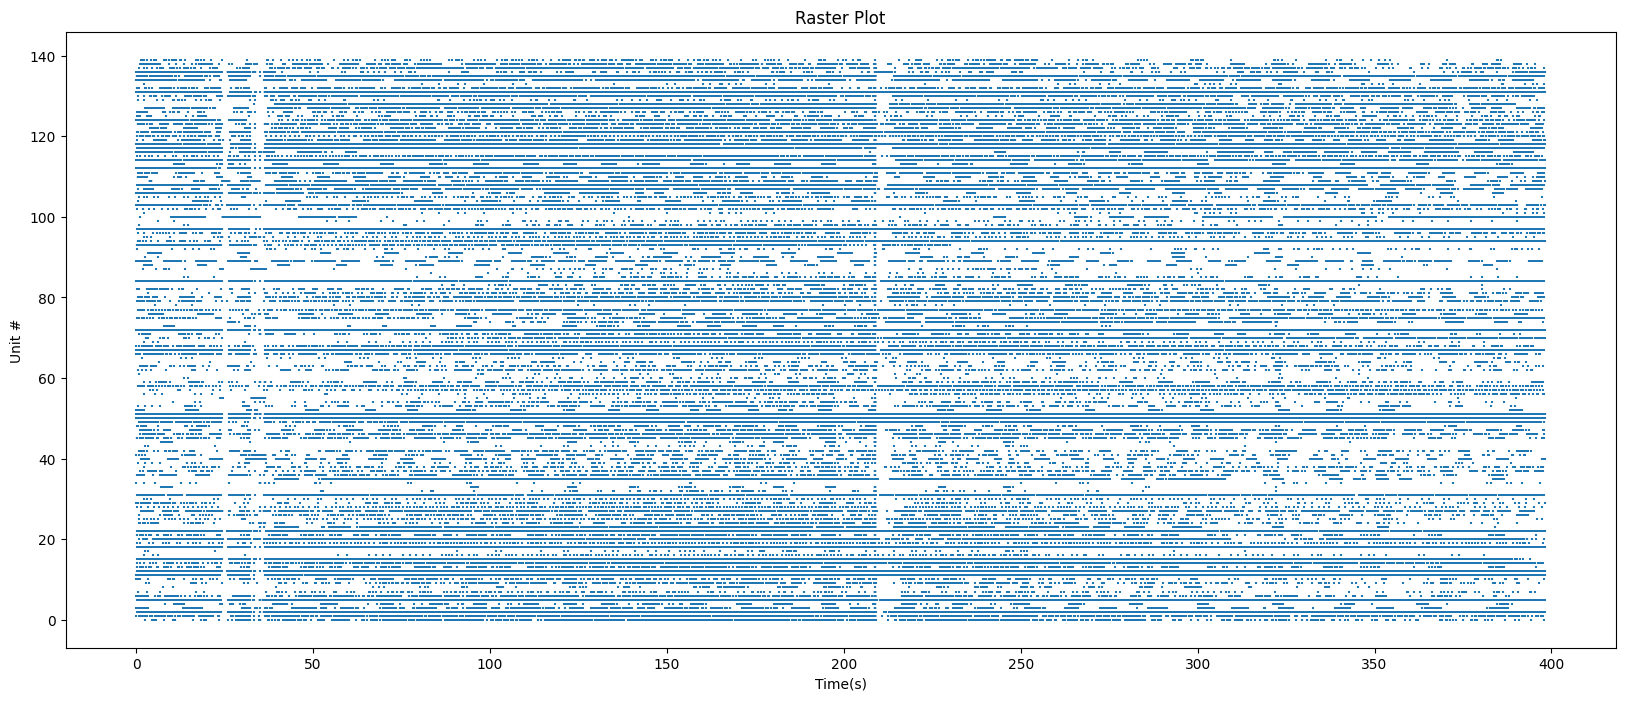

In [3]:
fig, ax = plt.subplots(figsize=(20, 8))
raster_plot(sd, ax)
plt.show()

plot another raster that including the average firing rate. 

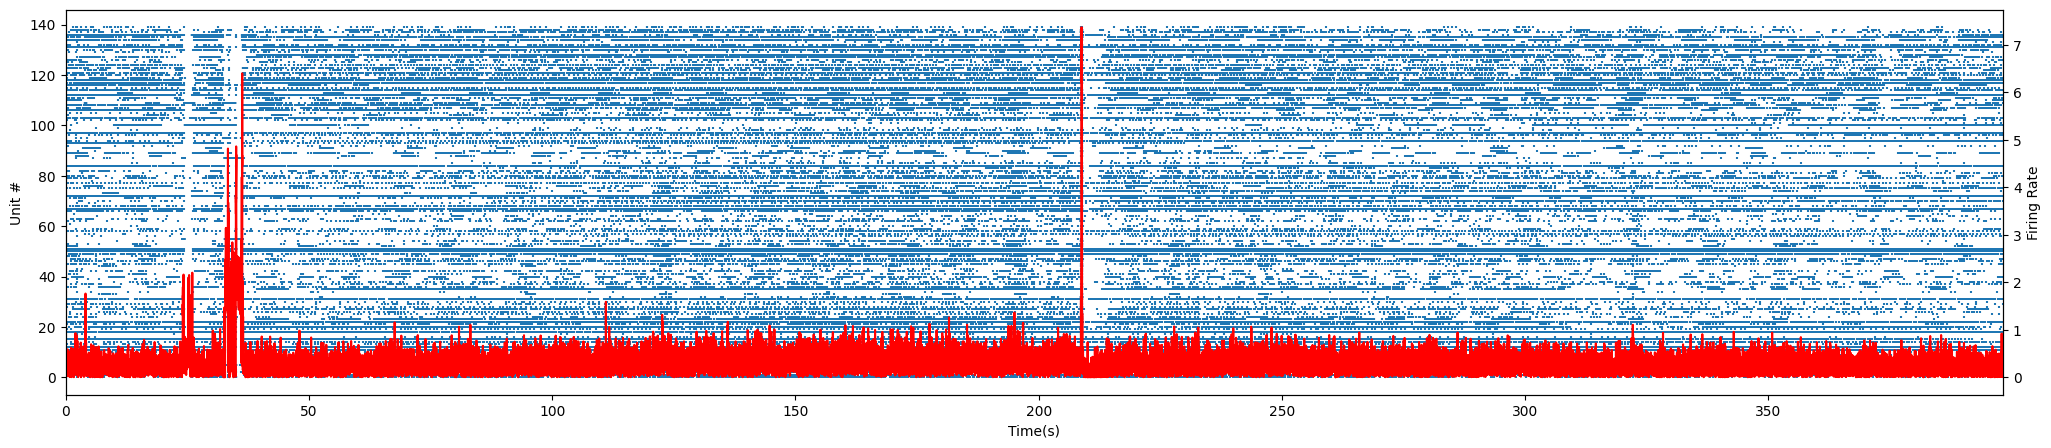

In [4]:
raster_fancy_plot(sd, xsize=25, ysize=5)

we see two regions that look suspcious lets zoom in on them

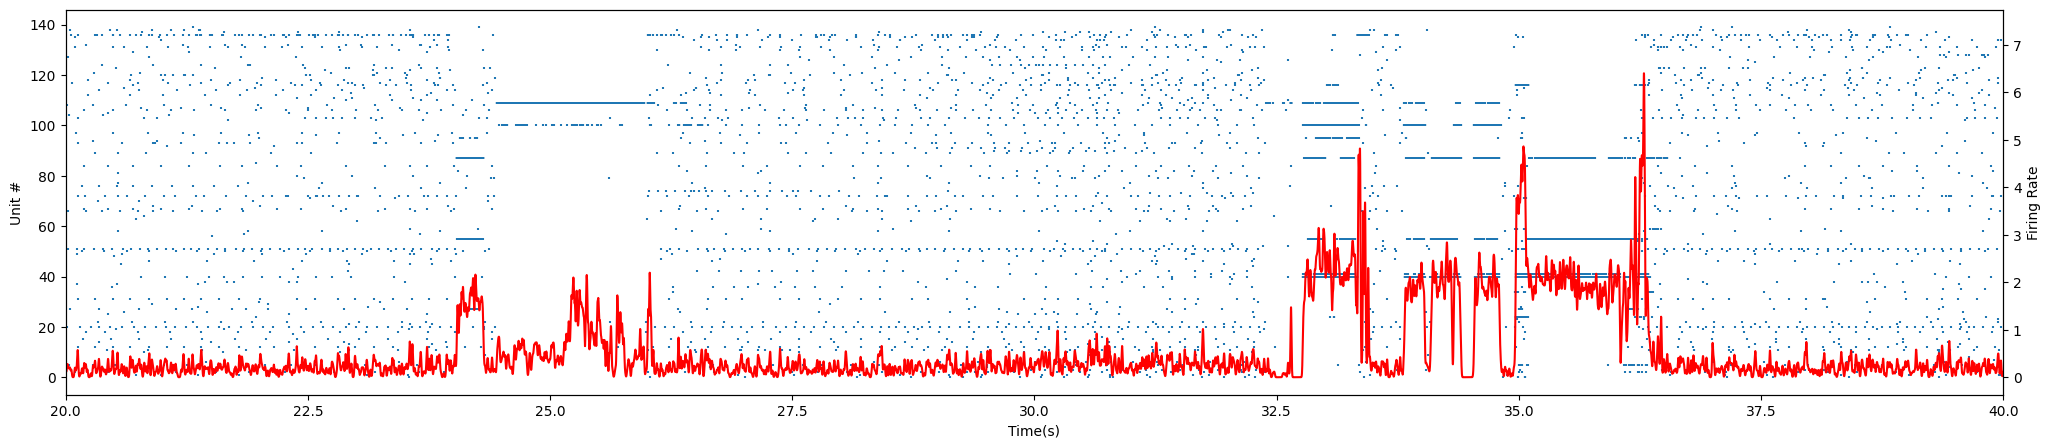

In [5]:
raster_fancy_plot(sd, xsize=25, ysize=5, start_time=20, stop_time=40)

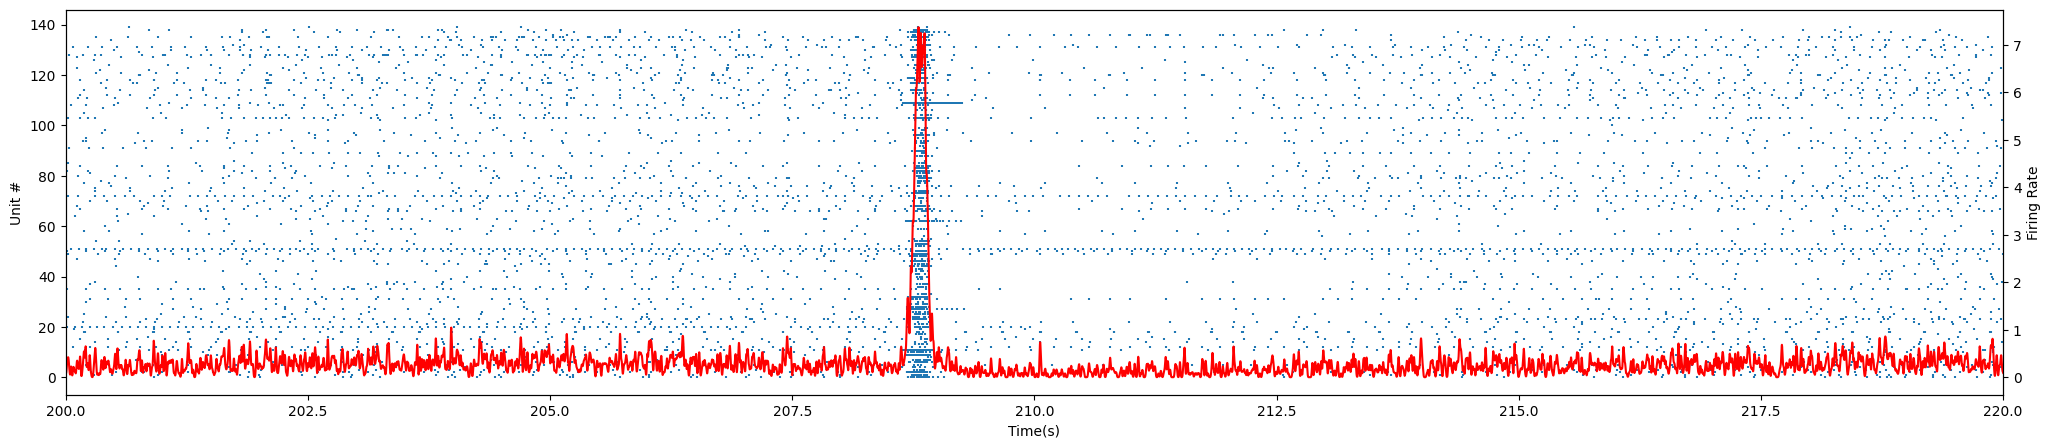

In [6]:
raster_fancy_plot(sd, xsize=25, ysize=5, start_time=200, stop_time=220)

## Remove anomilies

Remove from 22.5 to 27.5 seconds and Remove 32 to 37.5 seconds

get length of recording in ms

In [7]:
sd.length

398238.05

create sub-datasets and get their spike trains

In [8]:
sd_1 = sd.subtime(0, 22.5*1000)
sd_2 = sd.subtime(27.5*1000, 32*1000)
sd_3 = sd.subtime(37.5*1000, 207.5*1000)
sd_4 = sd.subtime(210*1000, sd.length)

spike_train_1 = sd_1.train
spike_train_2 = sd_2.train
spike_train_3 = sd_3.train
spike_train_4 = sd_4.train

Edit the spike trains so that the timing of spikes are correct

In [9]:
modified_spike_train_2 = [neuron_spike_times + 22.5*1000 for neuron_spike_times in spike_train_2]
modified_spike_train_3 = [neuron_spike_times + 27*1000 for neuron_spike_times in spike_train_3]
modified_spike_train_4 = [neuron_spike_times + 197*1000 for neuron_spike_times in spike_train_4]

Combine spike trains into a singe train

In [10]:
def combine_multiple_spike_trains(spike_train_list):
    num_neurons = len(spike_train_list[0])
    num_spike_trains = len(spike_train_list)
    combined_spike_train = [np.array([]) for _ in range(num_neurons)]
    
    for neuron in range(num_neurons):
        combined_neuron = np.array([])  # Initialize an empty array for each neuron
        for i in range(num_spike_trains):
            combined_neuron = np.append(combined_neuron, spike_train_list[i][neuron])
        combined_spike_train[neuron] = combined_neuron
    
    return combined_spike_train

# Call the function to combine spike trains
combined_spike_train = combine_multiple_spike_trains([spike_train_1, modified_spike_train_2, modified_spike_train_3, modified_spike_train_4])
print("Combined Spike Train:", len(combined_spike_train[0]))

Combined Spike Train: 978


Check info in spiketrain is correct

In [11]:
print(len(sd.train[0]))
len(combined_spike_train)

1014


140

turn spike train into a `spike_data` object

In [12]:
upd_sd2 = SpikeData(combined_spike_train, length=(sd_1.length + sd_2.length + sd_3.length + sd_4.length), N=sd_1.N, 
                         metadata=sd_1.metadata, neuron_data=sd_1.neuron_data,
                         neuron_attributes=sd_1.neuron_attributes)

/tmp/ipykernel_7427/2381289662.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  metadata=sd_1.metadata, neuron_data=sd_1.neuron_data,


check that it looks ok

In [13]:
print(upd_sd2.length)
print(sd.length)
print( (sd.length - upd_sd2.length) / 1000, "seconds gone")

385238.05
398238.05
13.0 seconds gone


plot new spike_data

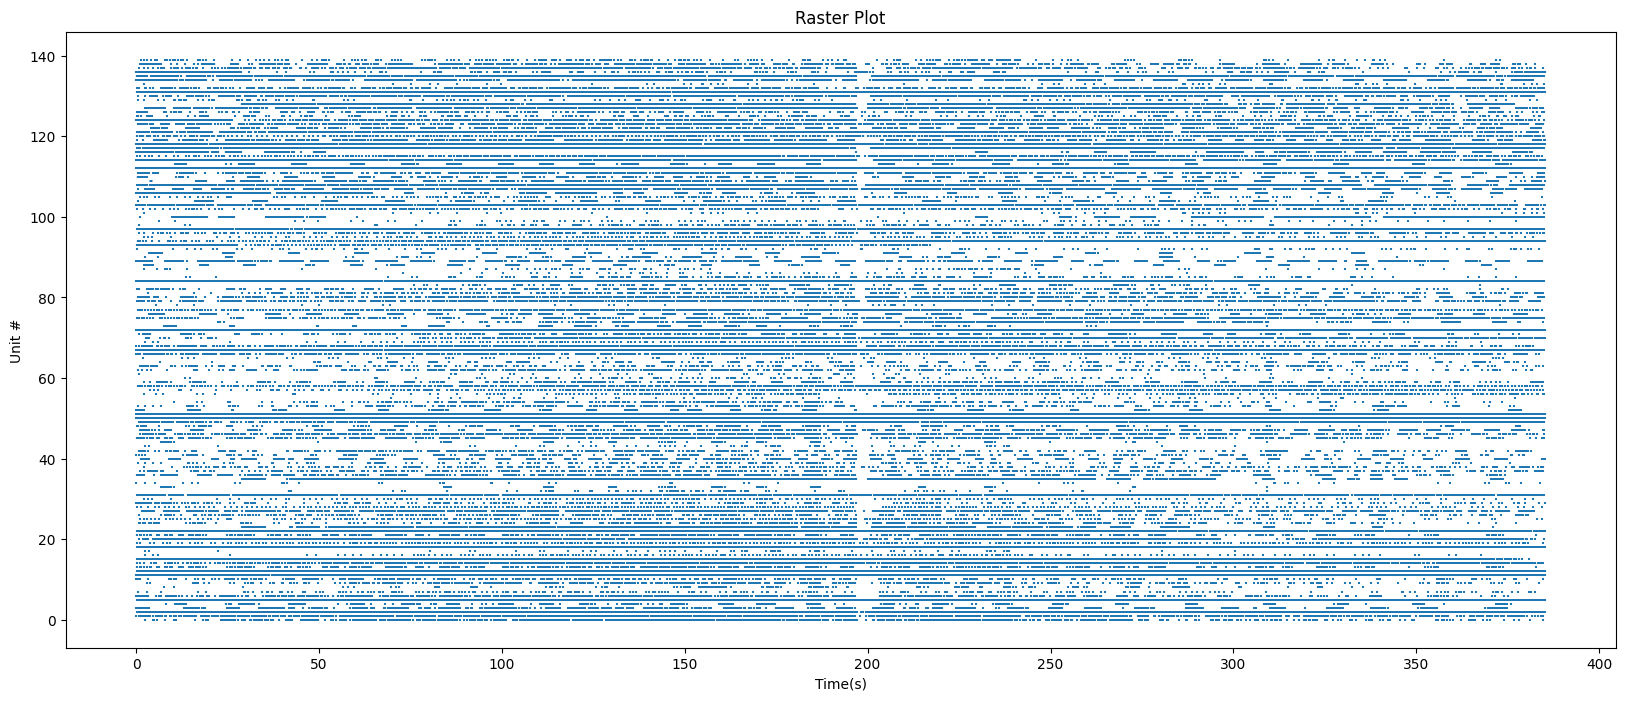

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))

# Call the plot_sttc function
raster_plot(upd_sd2, ax)

# Show the plot
plt.show()

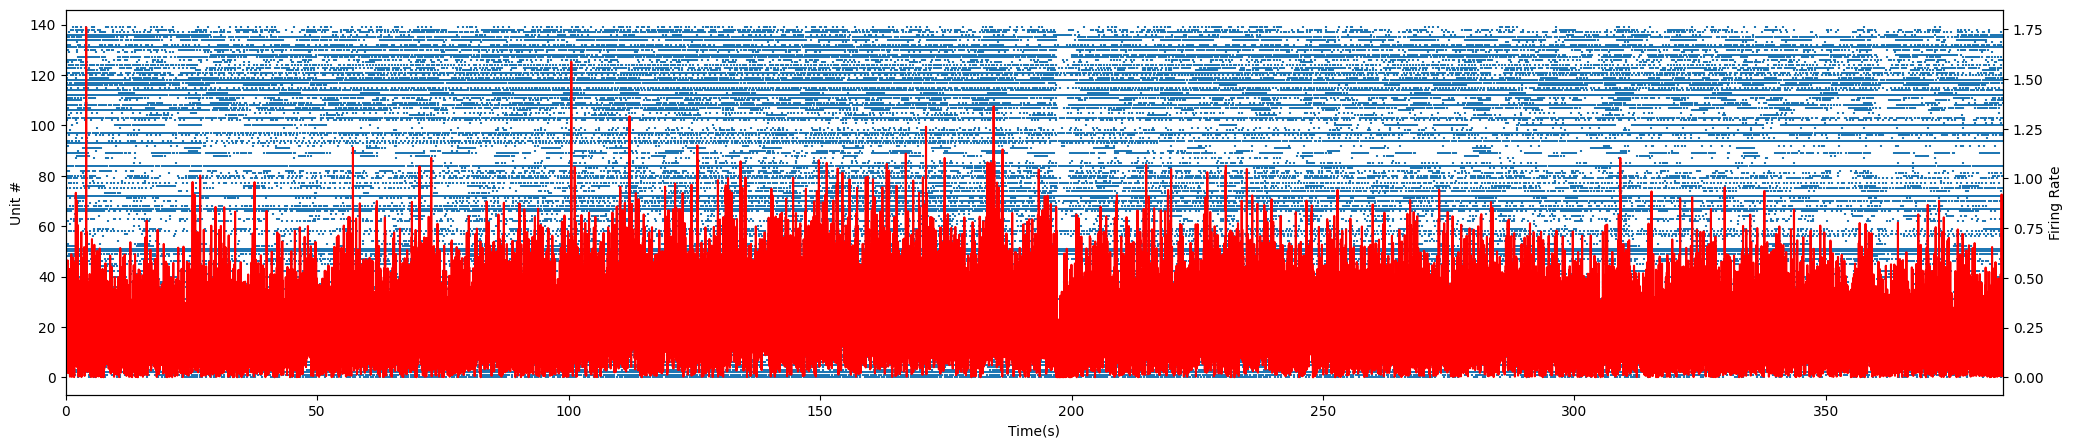

In [15]:
raster_fancy_plot(upd_sd2, xsize=25, ysize=5)

## Save Dataset

save dataset

<font color="red"> This line is commented out to protect against overwriting data


In [28]:
# with open( '/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/StitchedDataUpdated.pkl' , 'wb') as file:
#     pickle.dump(upd_sd2, file)

Load data

In [17]:
file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/StitchedDataUpdated.pkl', 'rb')
stitched_data = pickle.load(file)
file.close()

# Curate Unknown Dataset

## Review Data

We load in the unknown dataset.

In [29]:
sd2 = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-05-10-e-hc52_18790_unperturbed/derived/kilosort2/hc5.2_chip18790_baseline_rec5.10.23_curated_s1.zip')


Create plots of the data

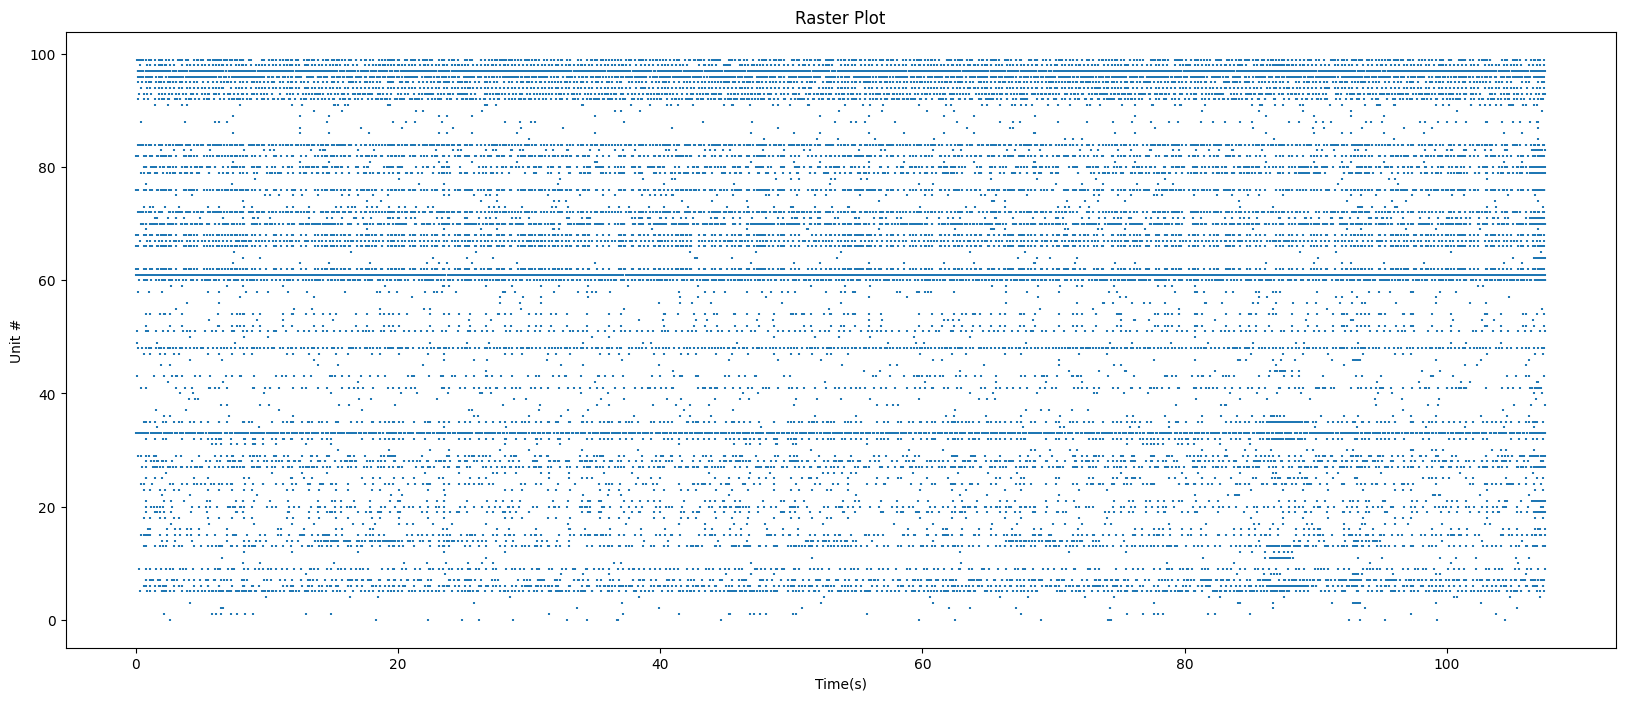

In [31]:
fig, ax = plt.subplots(figsize=(20, 8))
raster_plot(sd2, ax)
plt.show()

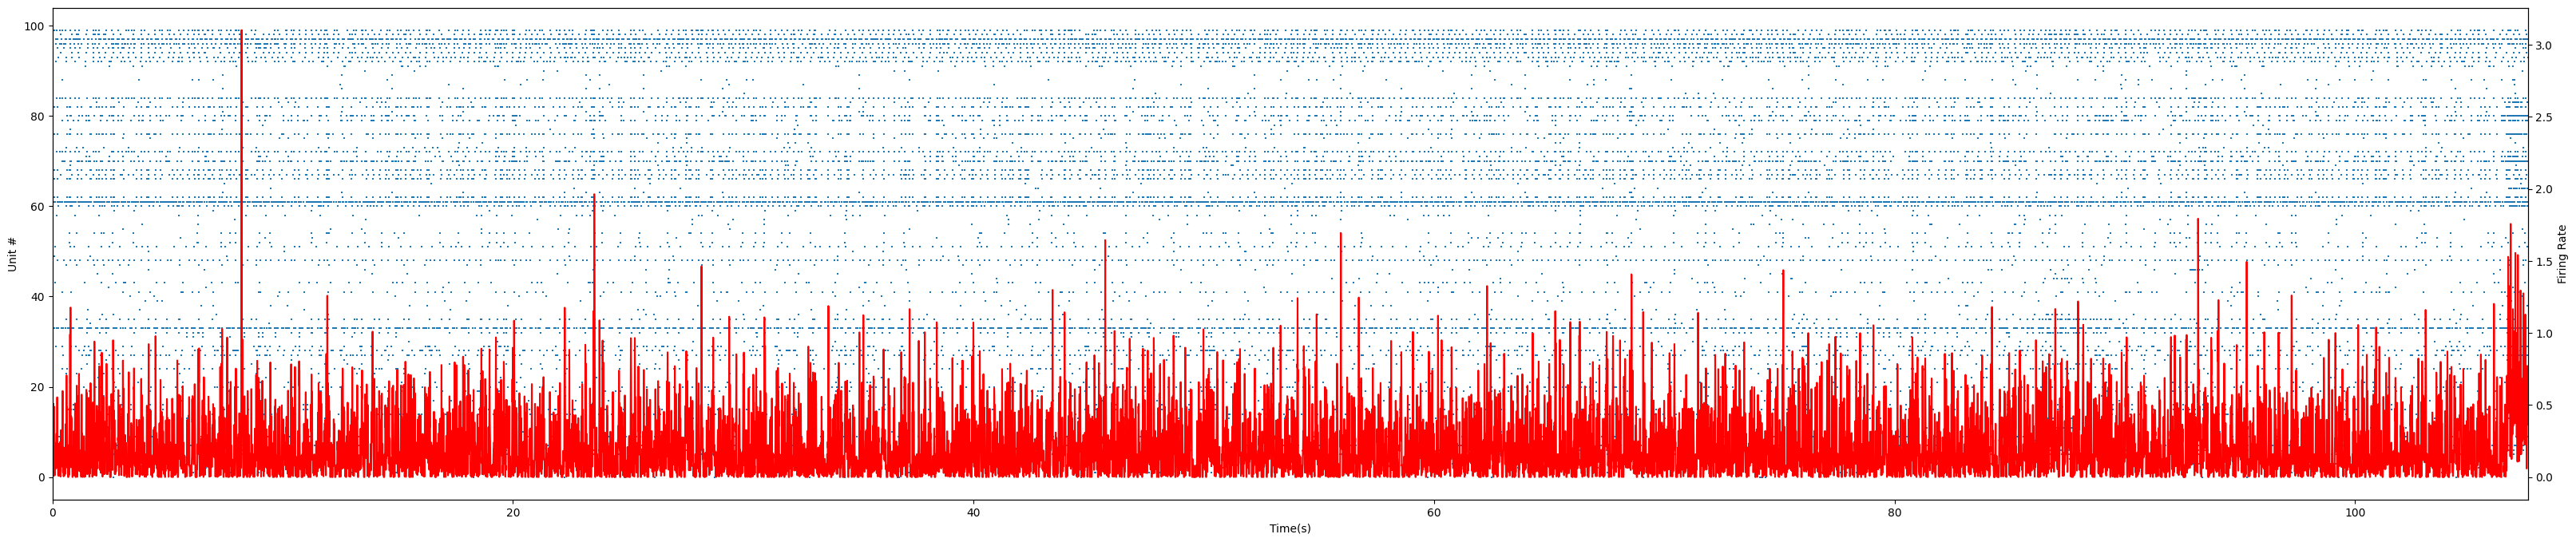

In [30]:
raster_fancy_plot(sd2,  xsize=40, ysize=8)

Zoom in on suspect regions

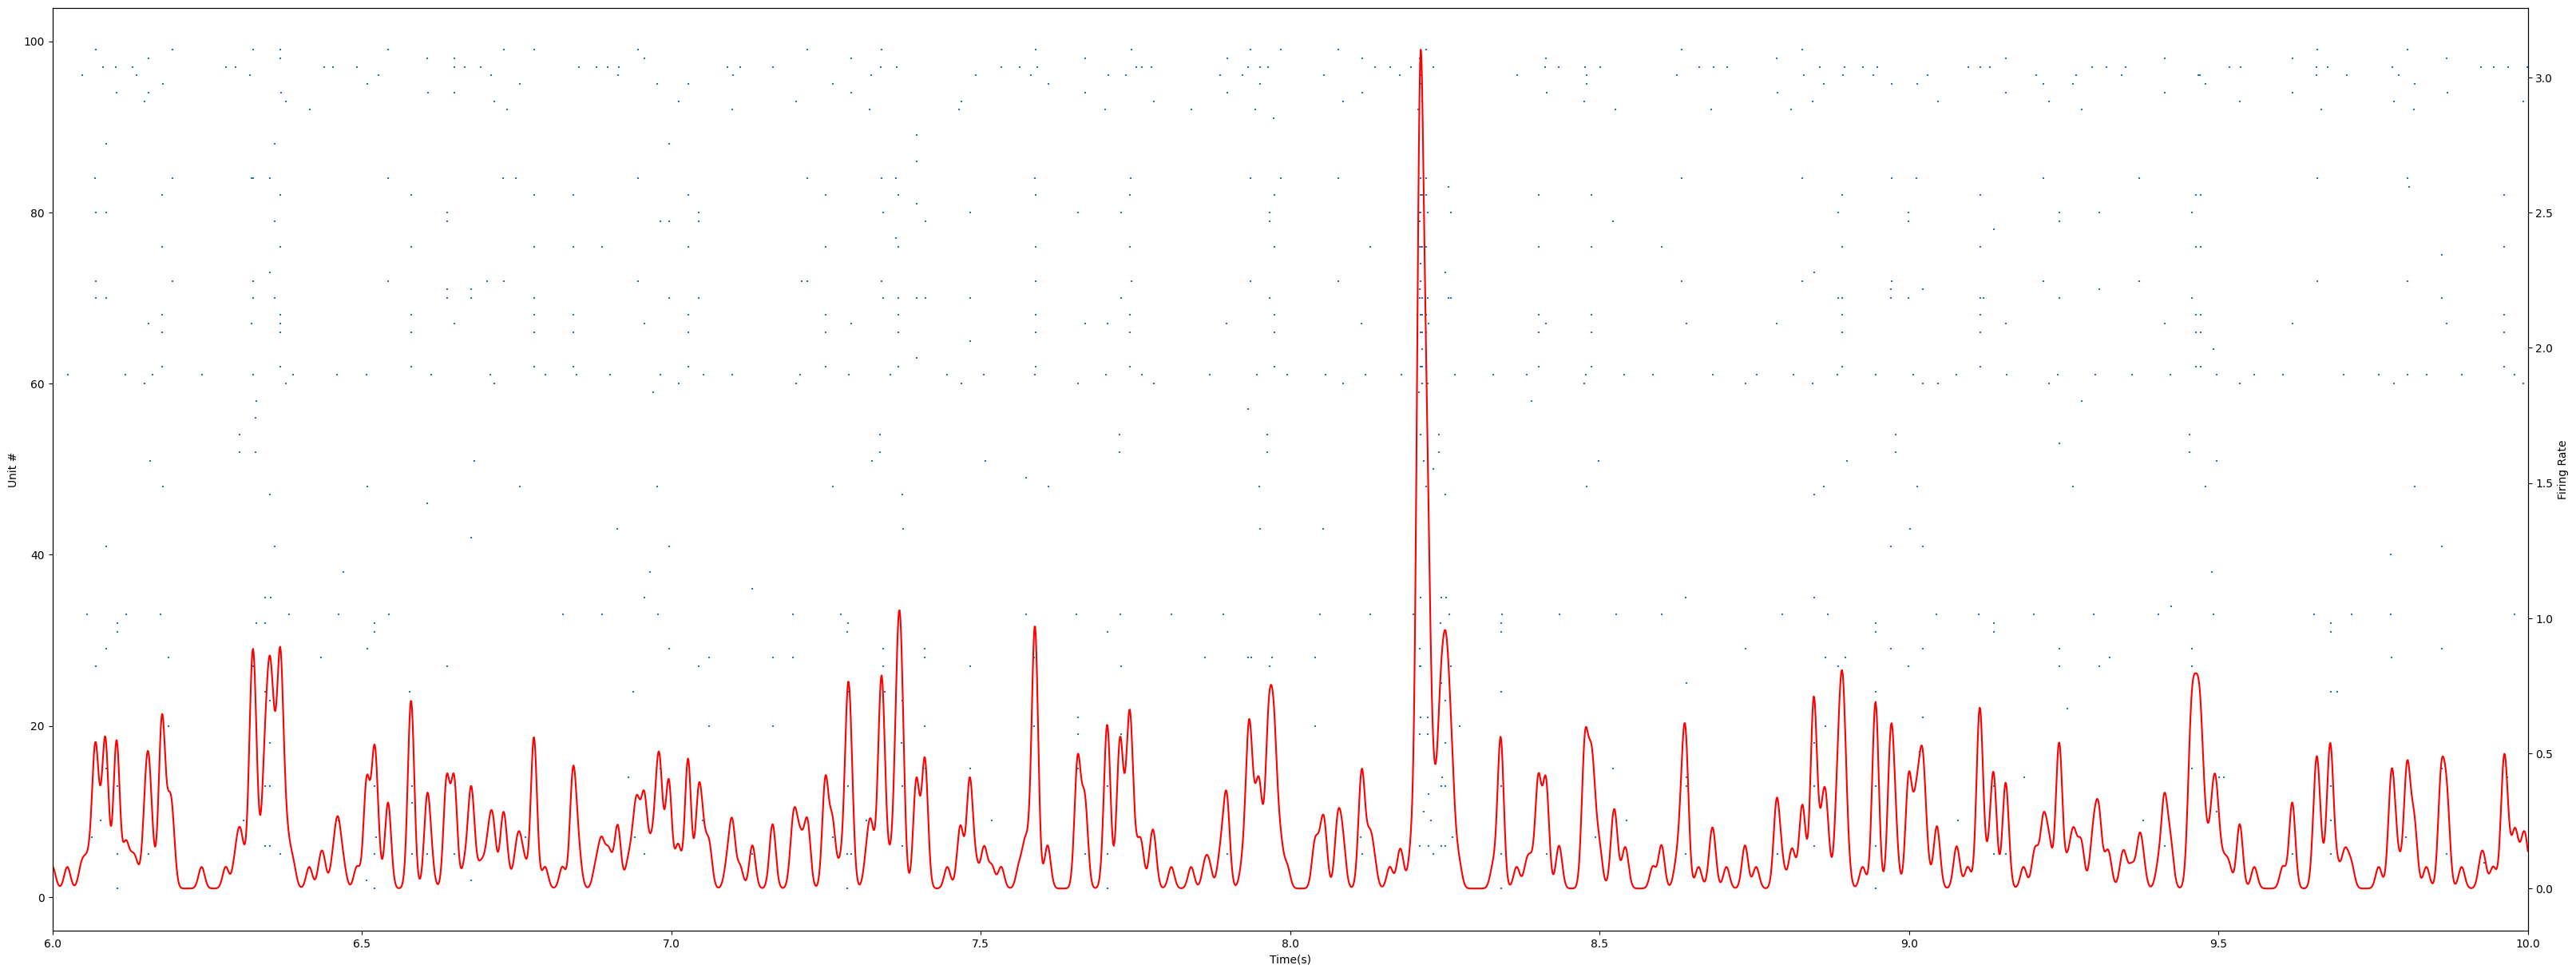

In [36]:
raster_fancy_plot(sd2,  xsize=40, ysize=15, start_time=6, stop_time=10 )

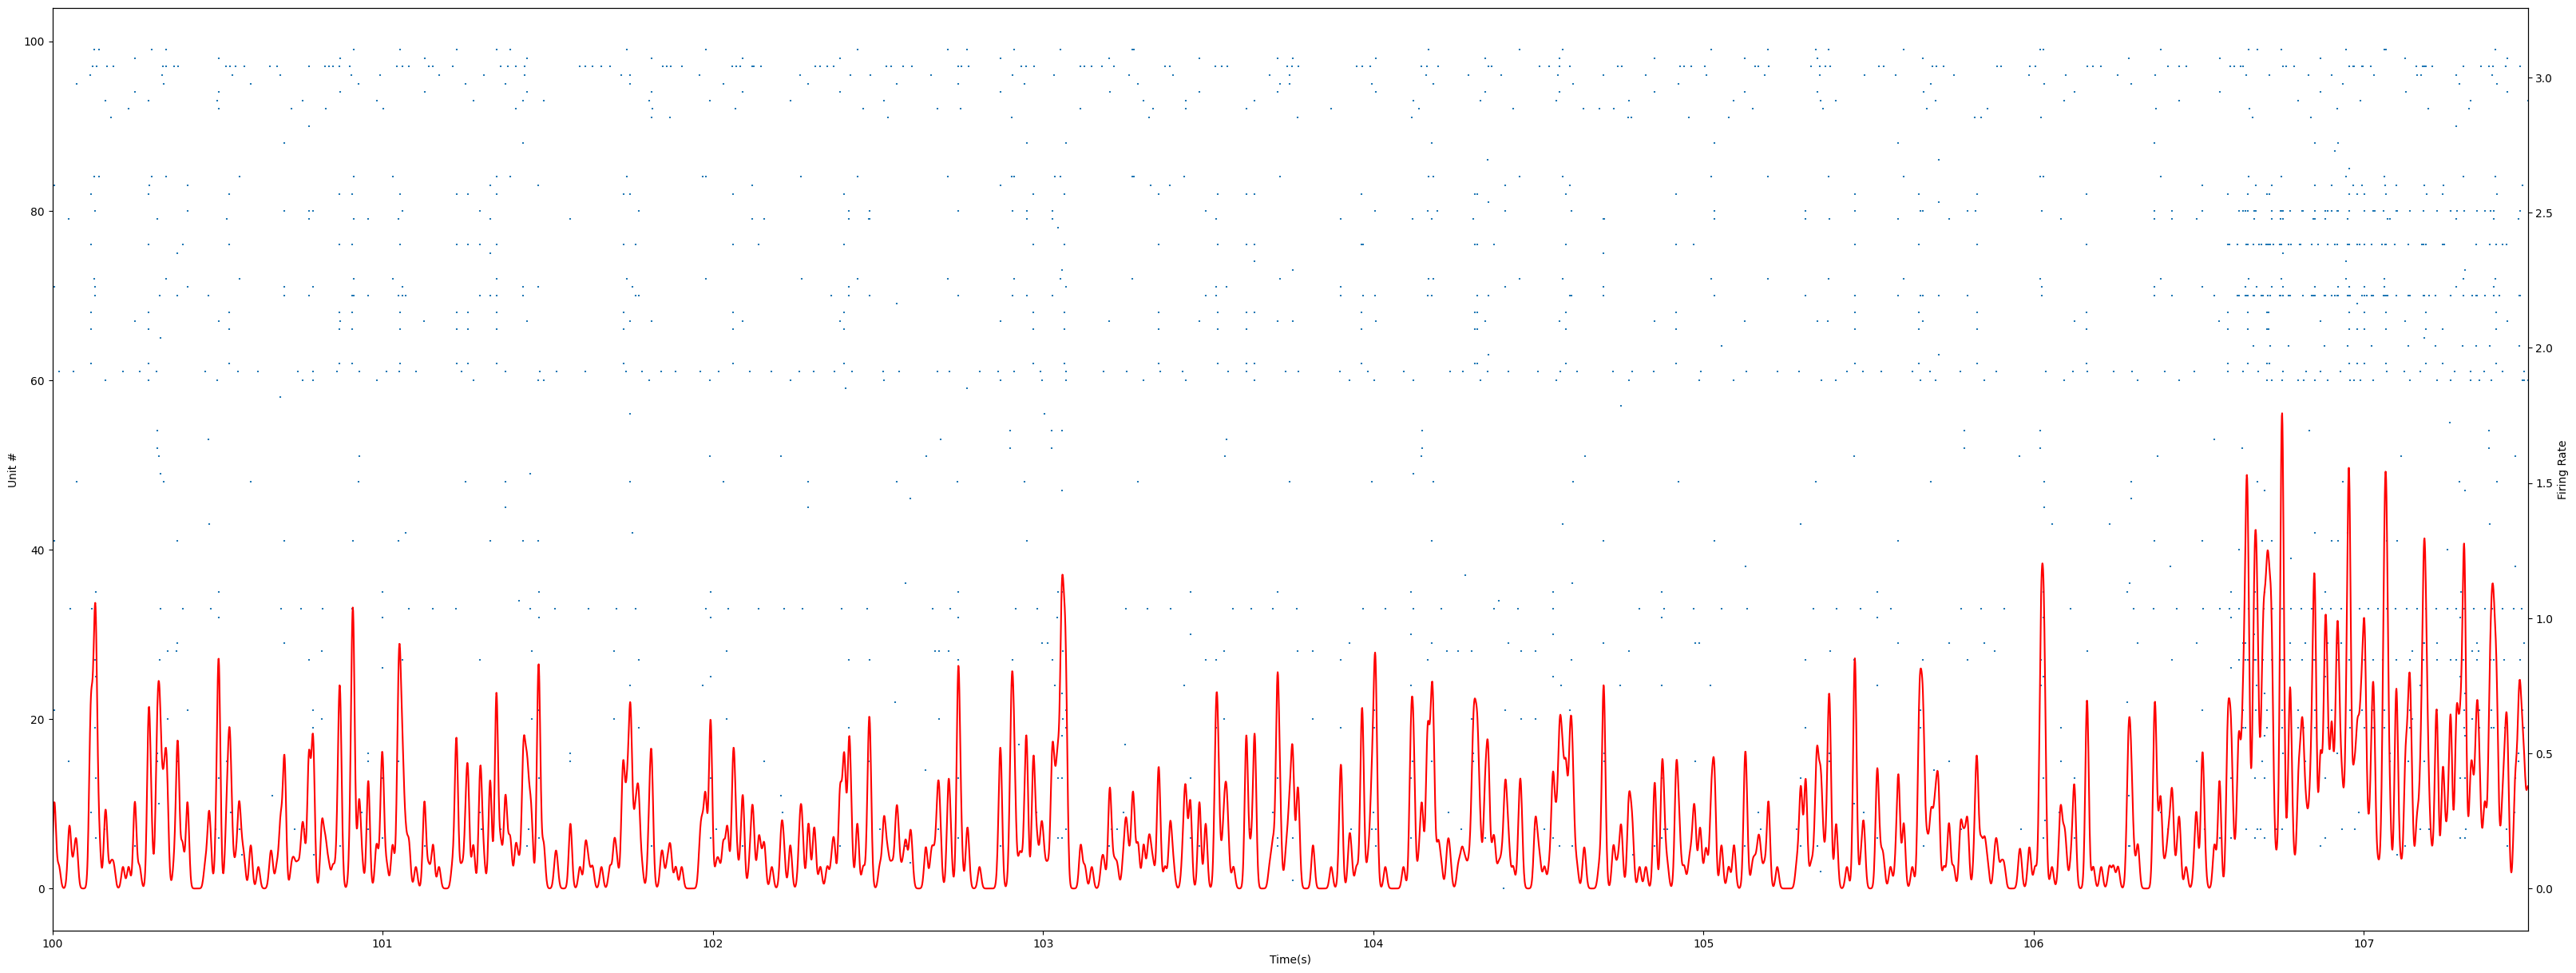

In [38]:
raster_fancy_plot(sd2,  xsize=40, ysize=15, start_time=100)

## Remove Anomilies

The data look mostly reasonable, except for the very end of the recording, so we remove only this portion of the data

In [39]:
new_cut_sd2 = sd2.subtime(0, 106.5*1000)

## Save Data

save dataset

<font color="red"> This line is commented out to protect against overwriting data


In [ ]:
#with open( '/workspaces/human_hippocampus/data/ephys/2023-05-10-e-hc52_18790_unperturbed/5-10-23s1-CutData.pkl.pkl'' , 'wb') as file:
#    pickle.dump(new_cut_sd2, file)

Load data

In [ ]:
file = open('/workspaces/human_hippocampus/data/ephys/2023-05-10-e-hc52_18790_unperturbed/5-10-23s1-CutData.pkl', 'rb' )
stitched_data = pickle.load(file)
file.close()

# Curate Dentat Gyrus

## Review Data

load in data

In [6]:
sd3 = read_phy_files( "/workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/derived/kilosort2/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_curated.zip" )

look at data

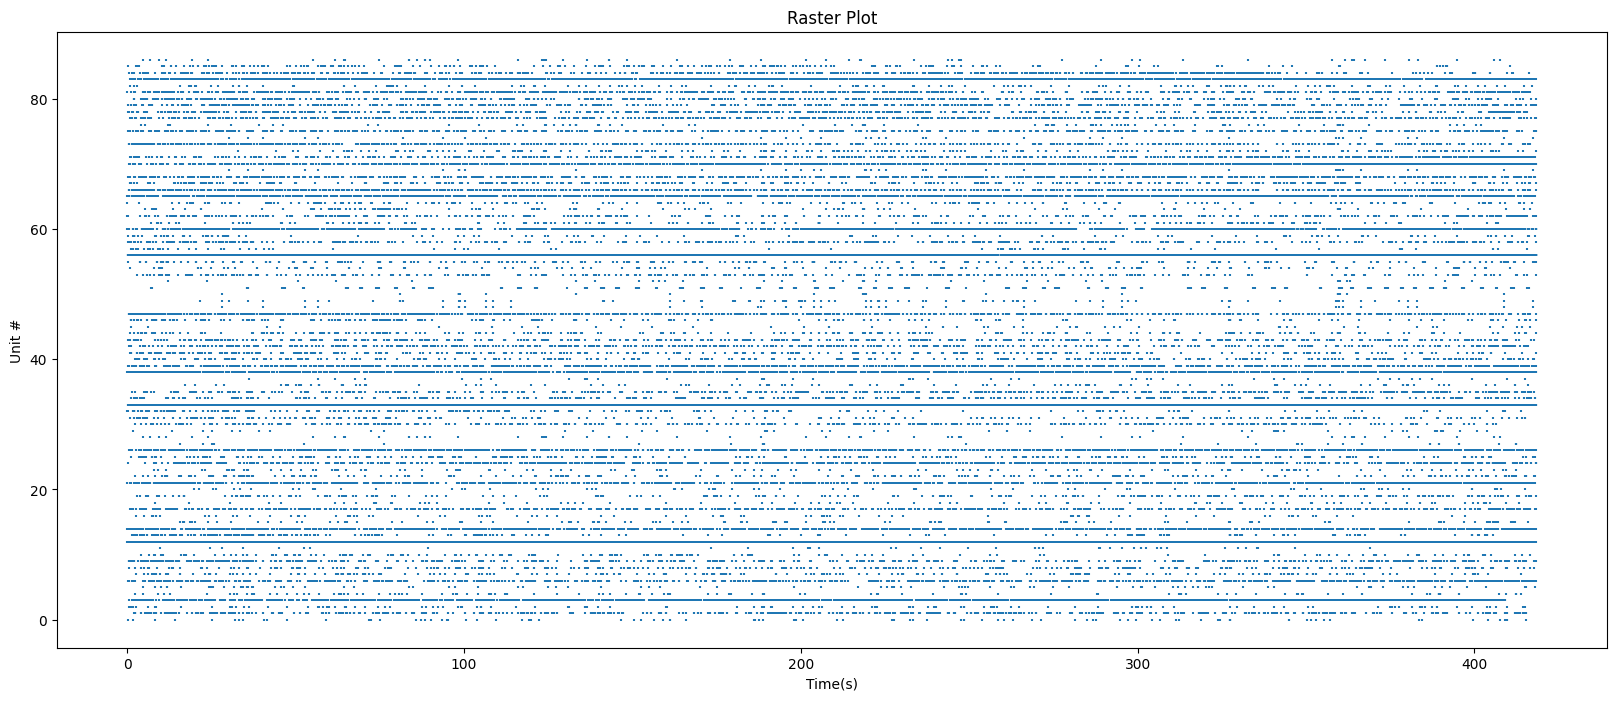

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
raster_plot(sd3, ax)
plt.show()

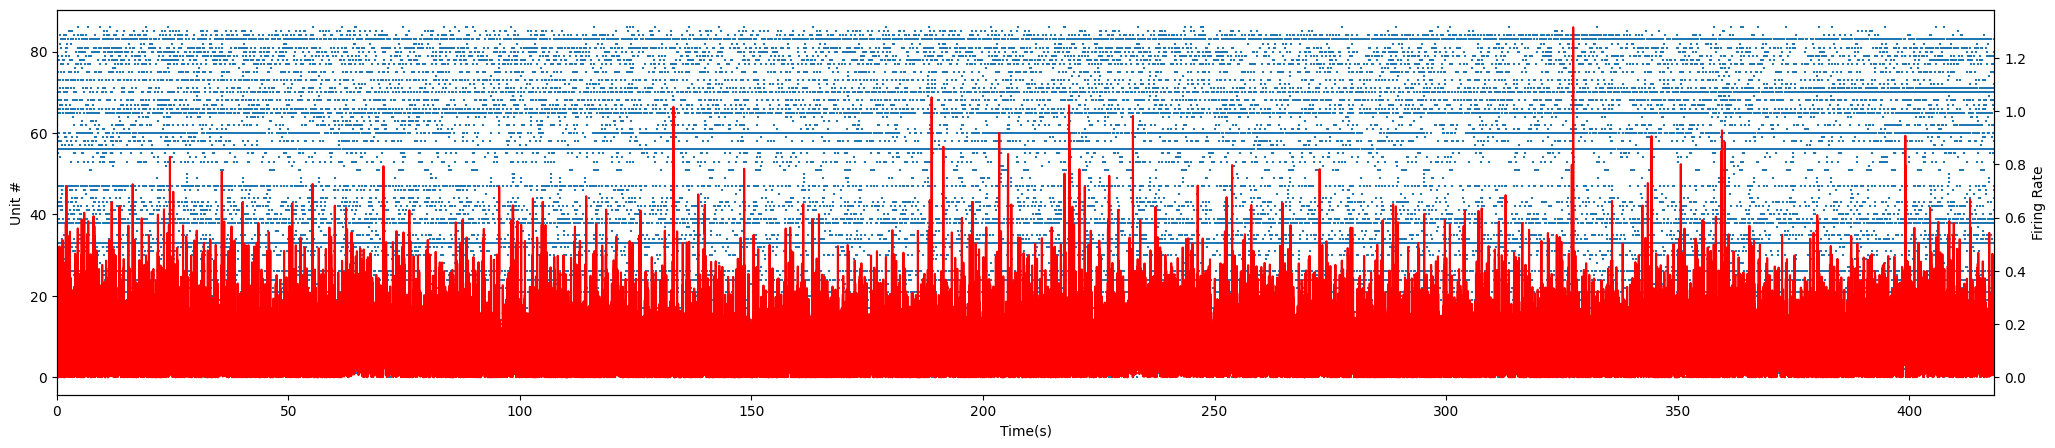

In [8]:
raster_fancy_plot(sd3, xsize=25, ysize=5)

zoom in on suspect regions

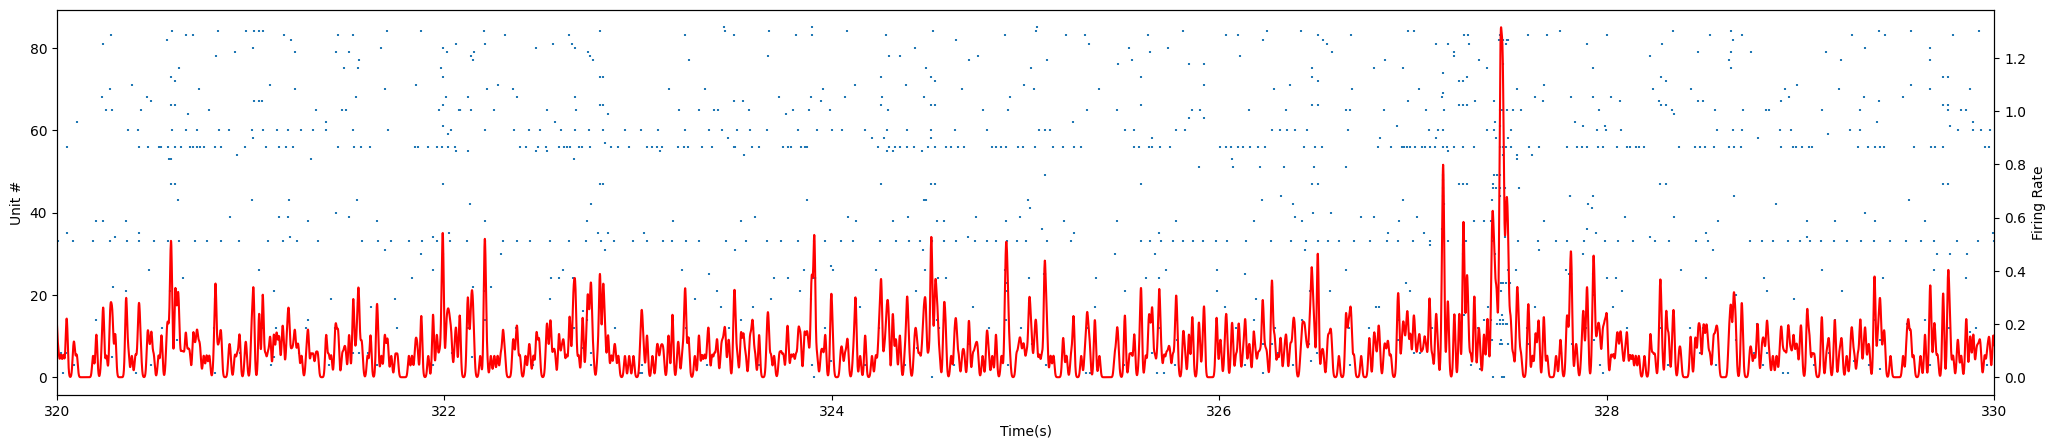

In [9]:
raster_fancy_plot(sd3, xsize=25, ysize=5, start_time=320, stop_time=330)

No part of this dataset looks particularly concerning, thuse we **leave it as is**.